In [1]:
# The Question: 
# Are rat sightings more common in areas that have a higher density of restaurants with low inspection grades?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

%matplotlib inline

# Import standard modules - pandas, numpy, and counter for basic data operations
# Import visualization libraries - matplotlib and seaborn

In [2]:
restaurants = pd.read_csv('/PATH_TO_DATA/DOHMH_New_York_City_Restaurant_Inspection_Results.csv')

print restaurants.shape
restaurants.isnull().sum()

# View data shape and missing/null values

(395602, 18)


CAMIS                         0
DBA                         394
BORO                          0
BUILDING                    133
STREET                        6
ZIPCODE                       6
PHONE                        16
CUISINE DESCRIPTION           0
INSPECTION DATE               0
ACTION                     1108
VIOLATION CODE             6132
VIOLATION DESCRIPTION      6789
CRITICAL FLAG                 0
SCORE                     22115
GRADE                    199712
GRADE DATE               201641
RECORD DATE                   0
INSPECTION TYPE            1108
dtype: int64

In [3]:
restaurants.head()

# Quick look at the top of the dataframe

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,50017056,SILVER SPOON DINER,QUEENS,5821,JUNCTION BLVD,11373.0,7183933000,American,06/21/2016,Violations were cited in the following area(s).,06E,"Sanitized equipment or utensil, including in-u...",Critical,12.0,A,06/21/2016,12/06/2017,Cycle Inspection / Initial Inspection
1,50053505,KUNG FU TEA,QUEENS,4111,KISSENA BLVD,11355.0,7188868236,CafÃ©/Coffee/Tea,10/06/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8.0,A,10/06/2016,12/06/2017,Pre-permit (Operational) / Initial Inspection
2,41416119,TASTY'S DINER,QUEENS,3304,DITMARS BOULEVARD,11105.0,7187778830,American,08/05/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,9.0,A,08/05/2014,12/06/2017,Cycle Inspection / Re-inspection
3,40596549,POLLOS A LA BARASA MARIO,QUEENS,4019,BROADWAY,11103.0,7189322424,"Latin (Cuban, Dominican, Puerto Rican, South &...",04/30/2015,No violations were recorded at the time of thi...,22C,"Bulb not shielded or shatterproof, in areas wh...",Not Critical,NaN,NaN,NaN,12/06/2017,Administrative Miscellaneous / Re-inspection
4,50009039,MID WINTER KITCHEN,MANHATTAN,327,2ND AVE,10003.0,2125058500,American,07/17/2014,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,12.0,A,07/17/2014,12/06/2017,Pre-permit (Operational) / Initial Inspection


In [4]:
# Our goal requires identification of violations involving rats, we can pick these out from the set of all violations

cats = set(restaurants['VIOLATION DESCRIPTION'])
tars = []

#for i in cats:
#    if 'mice' in str(i):
#        print i
#        tars.append(i)
#        print '\n'

for i in cats:
    if ' rat' in str(i):
        print i
        tars.append(i)
        print '\n'

Evidence of rats or live rats present in facility's food and/or non-food areas.




In [5]:
# We are most concerned with location data and grades, let's take a quick look at their distributions

print len(set(restaurants['ZIPCODE']))
print len(set(restaurants['BORO']))
print Counter(restaurants['BORO'])
print Counter(restaurants['GRADE'])

239
6
Counter({'MANHATTAN': 157407, 'BROOKLYN': 99419, 'QUEENS': 91062, 'BRONX': 34182, 'STATEN ISLAND': 13515, 'Missing': 17})
Counter({nan: 199712, 'A': 154583, 'B': 27382, 'C': 6929, 'Z': 3456, 'Not Yet Graded': 1934, 'P': 1606})


In [6]:
# A = Grade A 
# B = Grade B 
# C = Grade C 
# Z = Grade Pending
# P = Grade Pending issued on re-opening following an initial inspection that resulted in a closure

rats = []
grade = []
grades = {'A': 100.0, 'B': 50.0, 'C': 0.0}   

# Grades Z and P do not help us, as we are interested in existing grades. Missing values are assumed to be 
# not graded yet. We can translate these categoricals to a numerical scale that will reflect the strength 
# of an entire area's grade, once aggregated. If my numbers seem arbitrary, they are to an extent. I have simply
# chosen numbers that will help separate the lower graded areas when creating visualizations. Additionally, a 
# binary variable for rat violations will make for easy and insightful aggregations.

for i in range(restaurants.shape[0]):
    if restaurants['VIOLATION DESCRIPTION'][i] != tars[-1]:
        rats.append(0)
    else:
        rats.append(1)
    try:    
        grade.append(grades[restaurants['GRADE'][i]])
    except KeyError:
        grade.append(np.nan)

restaurants['grade'] = grade
restaurants['Rats'] = rats

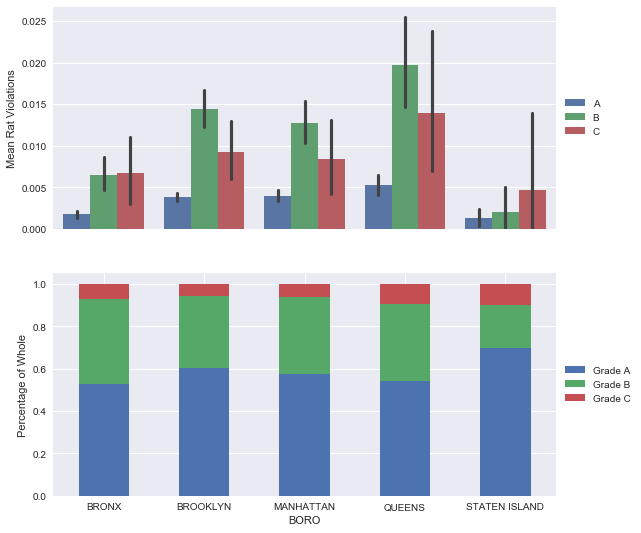

In [7]:
# Our two variables containing location data are 'BORO' and 'ZIPCODE'. Since BORO only has 6 values, it is a good
# place to start dividing up areas. I have created two barplots with a shared X axis that show us the average 
# number of rat violations per GRADE, and the frequency of each GRADE, in each of the BORO's. As can be seen below,
# Staten Island and the Bronx have the lowest rate of rat violations, while Queens has the highest. When
# comparing frequencies of restaurant grades, we can see that most of the BORO's have similar distributions of
# 'A' grades relative to 'B' and 'C'. It is intriguing that rat violations are generally highest for 'B' grades,
# defying the intution that C should be highest. Considering that Brooklyn, Manhattan, and Queens all have higher 
# rates of rat violations compared to the similarly distributed Bronx, the data seems to suggest that rat violations 
# have more to do with the area in question rather than the grade. 

df = restaurants[(restaurants['BORO']!= 'Missing') & (restaurants['GRADE'].isin(['A', 'B', 'C']))]

fig, (ax1, ax2) = plt.subplots(ncols = 1, nrows = 2, sharex = True, figsize = (9,9))    

sns.factorplot(x = "BORO", y = "Rats", hue = "GRADE", data = df,
                   size = 6, kind = "bar", ax = ax1)

ax1.set_ylabel('Mean Rat Violations')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))

tps = df.pivot_table(values=['Rats'], 
                      index='BORO',
                      columns='GRADE',
                      aggfunc='sum')

tps = tps.div(tps.sum(1), axis=0)
tps.plot(kind='bar', stacked=True,ax = ax2)

ax2.set_ylabel('Percentage of Whole')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), labels = ['Grade A', 'Grade B', 'Grade C'])

for tick in ax2.get_xticklabels():
    tick.set_rotation(0)

plt.close()

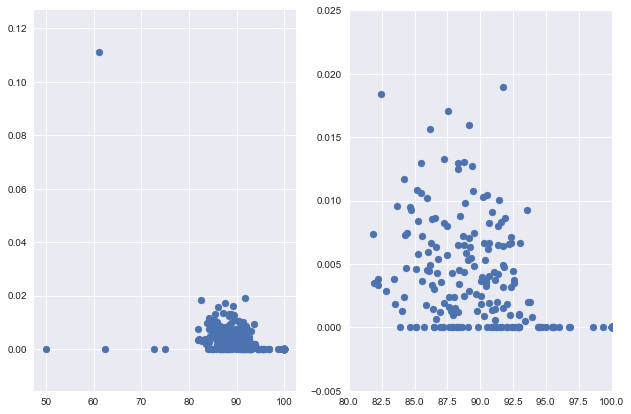

In [8]:
# Going one level further, let's look at ZIPCODE instead of BORO. We now have 239 locations instead of the 5 we had
# previously. After grouping the grades and rat violations by ZIPCODE, we can look at a simple scatterplot of each
# ZIPCODE's grade vs. rat violations. If the grade has a significant impact on rat violations, we should see a downward
# trend from left to right. The plot on the left contains all the data, while the plot on the right zooms in on the 
# cluster in the bottom right.

# Most of our data is contained within the created grade range of 82 to 95. There does not appear to be any visual
# trend in this grade range, as the data seems almost randomly splattered around. Considering that rat violations in 
# the grade range of 82 to 88 are nearly indistinguishable from those in 89 to 95, I would say that rat sightings
# are NOT more common in areas with higher density of lower restaurant inspection grades.

df2 = restaurants[restaurants['GRADE'].isin(['A', 'B', 'C'])].groupby(['ZIPCODE']).agg({'grade': 'mean', 'Rats': 'mean'})

fig = plt.figure(figsize=(16,7))

ax1 = plt.subplot(131)
ax1.scatter(df2['grade'],df2['Rats'])


ax2 = plt.subplot(132)
ax2.scatter(df2['grade'],df2['Rats'])
ax2.set_xlim([80, 100])
ax2.set_ylim([-0.005, 0.025])

plt.show()
plt.close()

In [9]:
# A Question of my own to answer?

# We did all these assessments for rats, but what about their not so different family members, mice? Do mice sightings
# occur more or less frequently, and in different areas?

cats = set(restaurants['VIOLATION DESCRIPTION'])
tars = []

for i in cats:
    if 'mice' in str(i):
        print i
        tars.append(i)
        print '\n'

Evidence of mice or live mice present in facility's food and/or non-food areas.




In [10]:
mice = []

for i in range(restaurants.shape[0]):
    if restaurants['VIOLATION DESCRIPTION'][i] != tars[-1]:
        mice.append(0)
    else:
        mice.append(1)


restaurants['Mice'] = mice

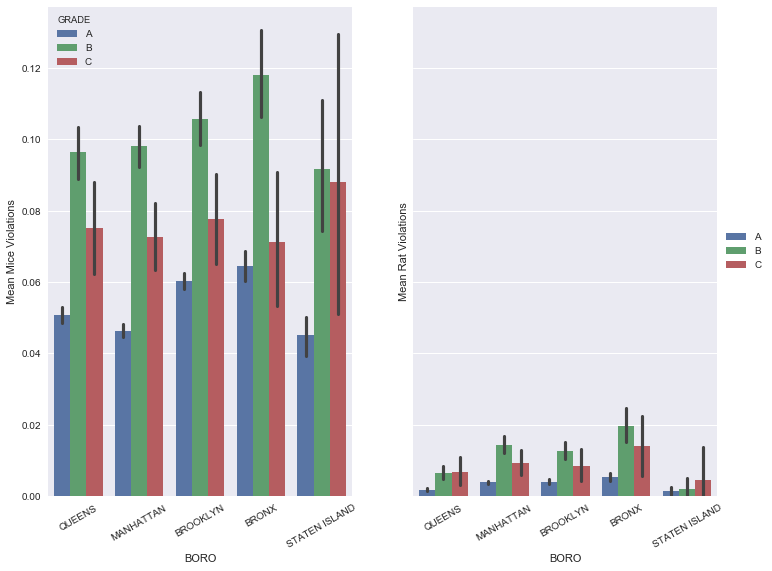

In [11]:
df = restaurants[(restaurants['BORO']!= 'Missing') & (restaurants['GRADE'].isin(['A', 'B', 'C']))]

fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, sharey = True, figsize = (12,9))    

sns.factorplot(x = "BORO", y = "Mice", hue = "GRADE", data = df,
                   size = 6, kind = "bar", ax = ax1)

ax1.set_ylabel('Mean Mice Violations')


sns.factorplot(x = "BORO", y = "Rats", hue = "GRADE", data = df,
                   size = 6, kind = "bar", ax = ax2)

ax2.set_ylabel('Mean Rat Violations')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

for tick in ax2.get_xticklabels():
    tick.set_rotation(30)
    
for tick in ax1.get_xticklabels():
    tick.set_rotation(30)

plt.close()
plt.close()  # I have yet to figure out the mystery of why matplotlib is adding empty plots to my subplots.
             # For now, this is my intermediate solution.

In [ ]:
# It's clear that Mice are a much larger problem than Rats, and with a lot more consistency across BORO's. While
# Staten Island and Queens have an easier time dealing with Rats, they are comparably struggling with Mice sightings
# relative to the other BORO's.